In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [2]:
file_path = 'dataset FYP'

In [3]:
name_class = os.listdir(file_path)
name_class

['acute_lymphocytic',
 'acute_myelogenous',
 'chronic_lymphocytic',
 'chronic_myelogenous',
 'healthy_blood_cell']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (1).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (10).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (100).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (101).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (102).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (103).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (104).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (105).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (106).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (107).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (108).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (109).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (11).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (110).jpg',
 'dataset FYP\\acute_lymphocytic\\acute_lymphocytic  (111).jpg',
 'dataset FYP\\acute_lymphocy

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_lymphocytic',
 'acute_ly

In [7]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,dataset FYP\acute_lymphocytic\acute_lymphocyti...,acute_lymphocytic
1,dataset FYP\chronic_lymphocytic\chronic_lympho...,chronic_lymphocytic
2,dataset FYP\acute_lymphocytic\acute_lymphocyti...,acute_lymphocytic
3,dataset FYP\healthy_blood_cell\healthy_blood_c...,healthy_blood_cell
4,dataset FYP\acute_lymphocytic\acute_lymphocyti...,acute_lymphocytic


In [8]:
#balancing

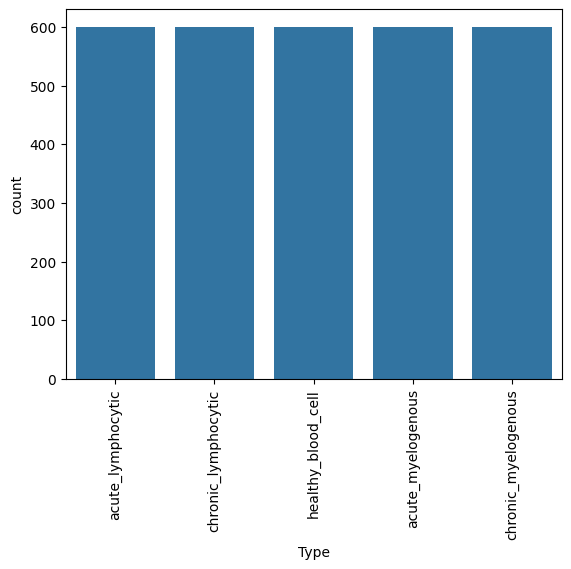

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [10]:
#balance by deleting extra images (Augmentor API)
#augmentation 
#GAN

In [11]:
train, test = train_test_split(data, test_size=0.20, random_state=42)

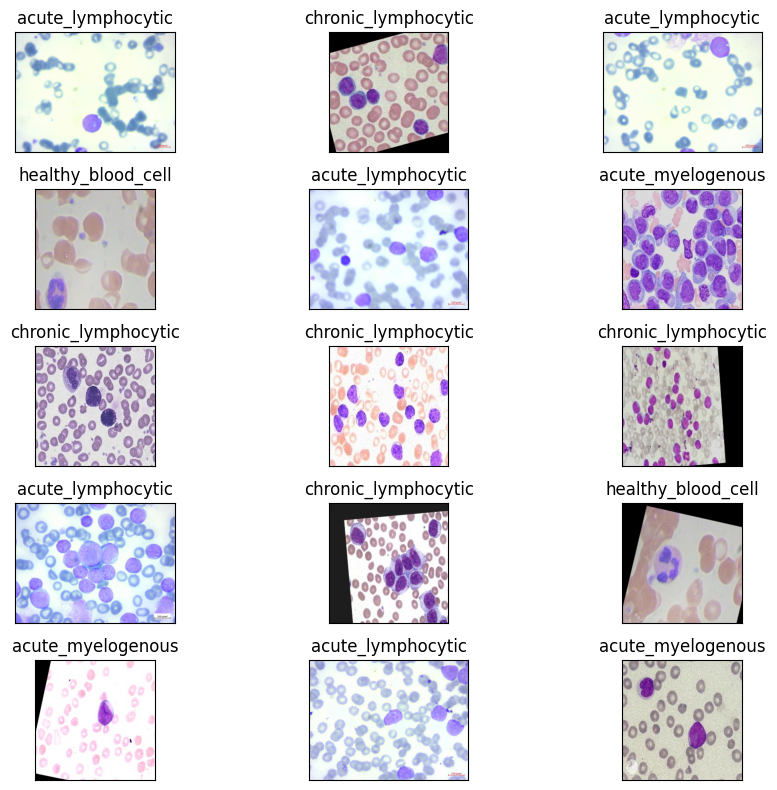

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [13]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [14]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2400 validated image filenames belonging to 5 classes.
Found 600 validated image filenames belonging to 5 classes.
Found 600 validated image filenames belonging to 5 classes.


In [15]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [16]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [19]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50
)

D:\anaconda\envs\leukemia_disease\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
D:\anaconda\envs\leukemia_disease\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50
75/75 [==============================] - 157s 2s/step - loss: 0.7171 - accuracy: 0.7158 - val_loss: 0.4646 - val_accuracy: 0.8233
Epoch 2/50
75/75 [==============================] - 142s 2s/step - loss: 0.4506 - accuracy: 0.8154 - val_loss: 0.4451 - val_accuracy: 0.8300
Epoch 3/50
75/75 [==============================] - 133s 2s/step - loss: 0.3608 - accuracy: 0.8650 - val_loss: 0.3030 - val_accuracy: 0.8650
Epoch 4/50
75/75 [==============================] - 135s 2s/step - loss: 0.3326 - accuracy: 0.8646 - val_loss: 0.2899 - val_accuracy: 0.8800
Epoch 5/50
75/75 [==============================] - 139s 2s/step - loss: 0.2798 - accuracy: 0.8929 - val_loss: 0.2547 - val_accuracy: 0.9017
Epoch 6/50
75/75 [==============================] - 135s 2s/step - loss: 0.3067 - accuracy: 0.8838 - val_loss: 0.3164 - val_accuracy: 0.8833
Epoch 7/50
75/75 [==============================] - 127s 2s/step - loss: 0.2188 - accuracy: 0.9150 - val_loss: 0.2592 - val_accuracy: 0.9033
Epoch 8/50
75

In [20]:
model.save("model_resnet50_model2.h5")  

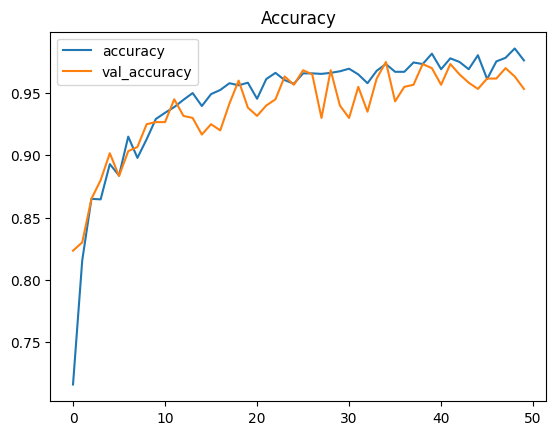

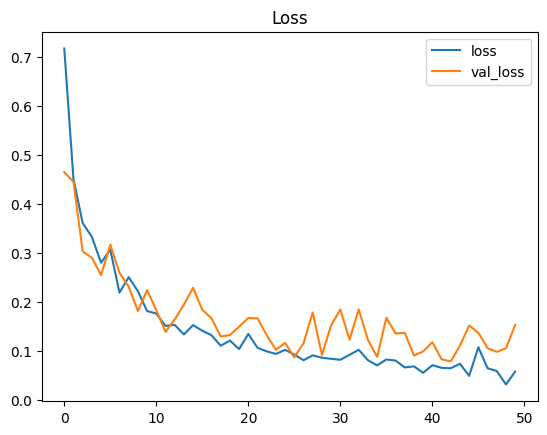

In [21]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [22]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

D:\anaconda\envs\leukemia_disease\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
D:\anaconda\envs\leukemia_disease\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


    Test Loss: 0.11350
Test Accuracy: 96.00%


In [23]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

19/19 [==============================] - 34s 2s/step


In [25]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

  acute_lymphocytic       1.00      0.99      1.00       117
  acute_myelogenous       0.92      0.95      0.94       126
chronic_lymphocytic       0.96      0.89      0.92       116
chronic_myelogenous       0.90      0.94      0.92       114
 healthy_blood_cell       0.99      1.00      1.00       127

           accuracy                           0.95       600
          macro avg       0.96      0.95      0.95       600
       weighted avg       0.96      0.95      0.95       600



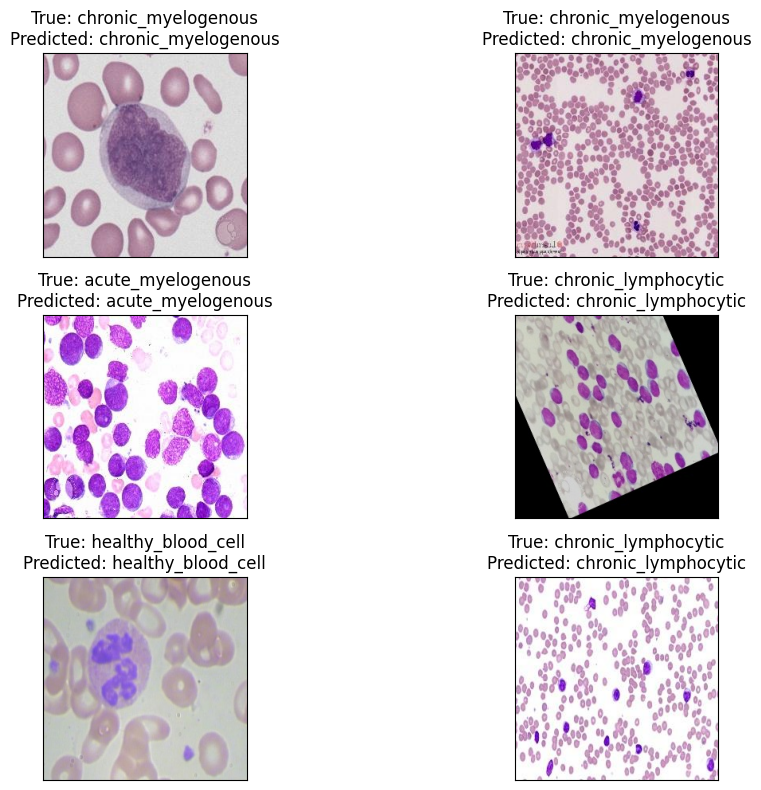

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [27]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'healthy_blood_cell (2).jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 [==============================] - 2s 2s/step
[[ 0  0  0  0 99]]


In [28]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_resnet50_model2.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [29]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'healthy_blood_cell (2).jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 [==============================] - 2s 2s/step
[[ 0  0  0  0 99]]


In [30]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[0, 0, 0, 0, 99]


In [31]:
print("Largest element is:", max(pp))

Largest element is: 99


In [32]:
index = pp.index(max(pp))

In [33]:
name_class=["acute_lymphocytic","acute_myelogenous","chronic_lymphocytic","chronic_myelogenous","healthy_blood_cell"]

In [34]:
name_class[index]

'healthy_blood_cell'

In [35]:
import matplotlib.pyplot as plt

In [36]:
plt.imread(img_path)

array([[[174, 153, 136],
        [169, 147, 134],
        [170, 146, 146],
        ...,
        [183, 168, 161],
        [175, 160, 157],
        [176, 161, 158]],

       [[174, 153, 136],
        [168, 146, 133],
        [168, 144, 142],
        ...,
        [184, 169, 164],
        [177, 162, 159],
        [175, 160, 157]],

       [[172, 153, 136],
        [165, 146, 132],
        [165, 144, 139],
        ...,
        [188, 170, 166],
        [181, 163, 161],
        [176, 158, 156]],

       ...,

       [[178, 171, 163],
        [184, 177, 169],
        [191, 187, 178],
        ...,
        [209, 198, 214],
        [218, 211, 218],
        [210, 204, 206]],

       [[190, 188, 173],
        [197, 195, 180],
        [201, 202, 186],
        ...,
        [212, 199, 217],
        [223, 211, 221],
        [212, 203, 208]],

       [[199, 201, 180],
        [205, 207, 186],
        [207, 210, 191],
        ...,
        [216, 201, 220],
        [227, 215, 225],
        [213, 202, 208]]

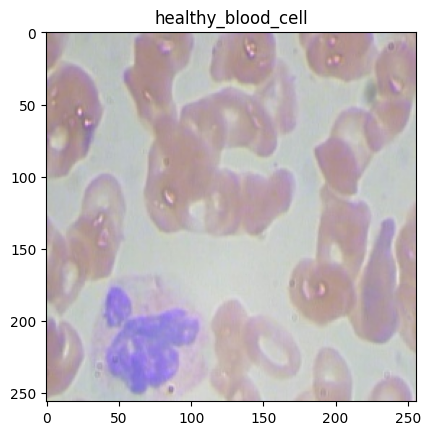

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()

D:\anaconda\envs\leukemia_disease\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
D:\anaconda\envs\leukemia_disease\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


19/19 [==============================] - 28s 1s/step


<Figure size 1000x800 with 0 Axes>

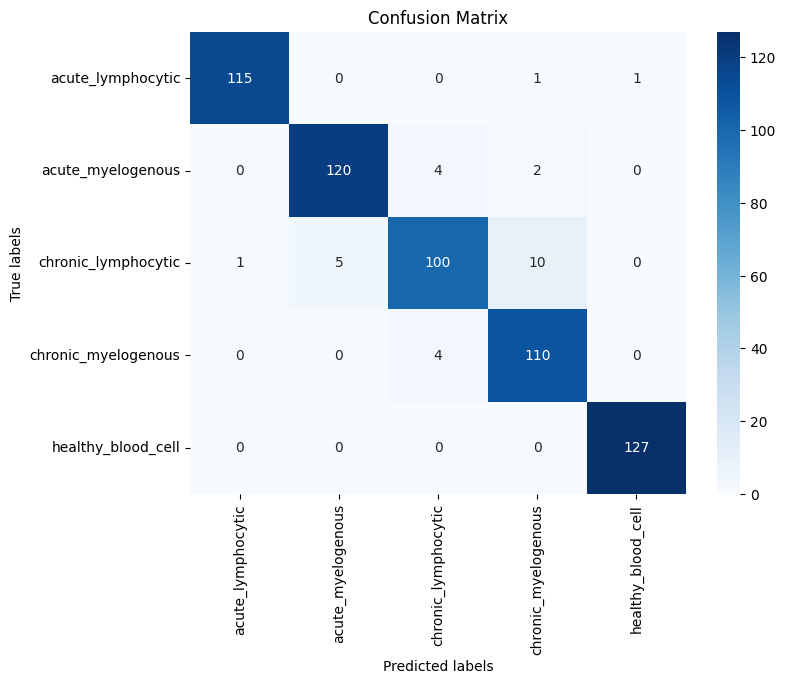

In [42]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions = model.predict(test_gen)
y_true = test_gen.classes
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 8))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['acute_lymphocytic',
 'acute_myelogenous',
 'chronic_lymphocytic',
 'chronic_myelogenous',
 'healthy_blood_cell']  , 
            yticklabels=['acute_lymphocytic',
 'acute_myelogenous',
 'chronic_lymphocytic',
 'chronic_myelogenous',
 'healthy_blood_cell']  )
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
